In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sympy as sp

In [23]:
theta = sp.Symbol('theta')
eta = sp.Symbol('eta')

R = sp.Matrix([[1, 0, 0],
               [0, sp.cos(-eta), -sp.sin(-eta)],
               [0, sp.sin(-eta),  sp.cos(-eta)],
])

M = sp.Matrix([
    [ sp.cos(2 * theta)-1           ,   0 ,    0 ,      0       ,  -sp.sin(2 * theta)             ],
    [-sp.sin(eta)*sp.sin(2 * theta) ,  -1 ,    0 ,  sp.cos(eta) ,  -sp.sin(eta)*sp.cos(2 * theta) ],
    [ sp.cos(eta)*sp.sin(2 * theta) ,   0 ,   -1 ,  sp.sin(eta) ,   sp.cos(eta)*sp.cos(2 * theta) ]
])

display(sp.simplify(M))
display(sp.simplify(R*M))



Matrix([
[      cos(2*theta) - 1,  0,  0,        0,          -sin(2*theta)],
[-sin(eta)*sin(2*theta), -1,  0, cos(eta), -sin(eta)*cos(2*theta)],
[ sin(2*theta)*cos(eta),  0, -1, sin(eta),  cos(eta)*cos(2*theta)]])

Matrix([
[                                cos(2*theta) - 1,         0,         0,          0,                                    -sin(2*theta)],
[-cos(2*eta - 2*theta)/2 + cos(2*eta + 2*theta)/2, -cos(eta),  sin(eta), cos(2*eta), -sin(2*eta - 2*theta)/2 - sin(2*eta + 2*theta)/2],
[                         sin(2*theta)*cos(2*eta), -sin(eta), -cos(eta), sin(2*eta),                          cos(2*eta)*cos(2*theta)]])

In [24]:
u1,u2 = sp.Symbol('u_1'), sp.Symbol('u_2')
x1,x2,x3,x4,x5 = sp.Symbol('x_1'), sp.Symbol('x_2'), sp.Symbol('x_3'), sp.Symbol('x_4'), sp.Symbol('x_5')
x_p = sp.Matrix([
    [ x1 ],
    [ x2 ],
    [ x3 ],
    [ x3 ],
    [ x5 ],
])
n1 = sp.simplify((R*M).nullspace()[0])
n2 = sp.simplify((R*M).nullspace()[1])
display(n1.T)
display(n2.T)


Matrix([[0, cos(eta), sin(eta), 1, 0]])

Matrix([[-1/tan(theta), sin(eta), -cos(eta), 0, 1]])

In [4]:
display( (n1*u1 + n2*u2) )

# u2 < -tan(th) * ub_1

Matrix([
[            -u_2/tan(theta)],
[u_1*cos(eta) + u_2*sin(eta)],
[u_1*sin(eta) - u_2*cos(eta)],
[                        u_1],
[                        u_2]])

0.0019328189955558628
       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00]
                marginals: [ 0.000e+00  0.000e+00]
         upper:  residual: [       inf        inf]
                marginals: [ 0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 2.211e-02  2.588e-01  7.967e-02  3.684e-01
                             7.387e-01  3.428e-02  3.600e-01  6.258e-01
                             3.251e-01  7.279e-01]
                marginals: [-0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00
                            -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00
                            -0.000e+00 -0.000e+00]


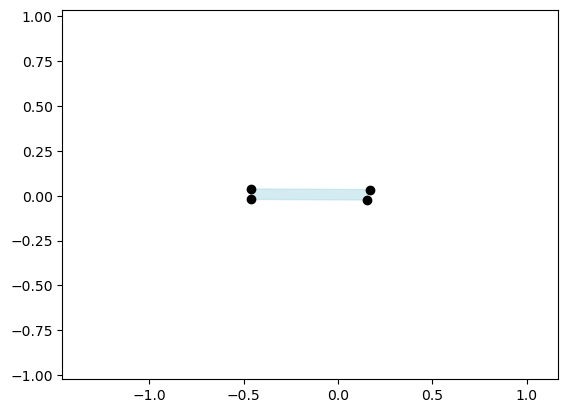

In [191]:
theta = np.radians(10)
eta = np.radians(45)
dQ = np.array([1, 1.1423, -0.82346])
k = 100
M = k * np.array([
    [ np.cos(2 * theta)-1           ,   0 ,    0 ,      0       ,  -np.sin(2 * theta)             ],
    [-np.sin(eta)*np.sin(2 * theta) ,  -1 ,    0 ,  np.cos(eta) ,  -np.sin(eta)*np.cos(2 * theta) ],
    [ np.cos(eta)*np.sin(2 * theta) ,   0 ,   -1 ,  np.sin(eta) ,   np.cos(eta)*np.cos(2 * theta) ]
])

from scipy.spatial import HalfspaceIntersection
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
from scipy.optimize import linprog


import time



_,_,vh = np.linalg.svd(M)
null = vh.T[:,-2:]
lower_bound = -np.random.rand(5)
upper_bound = np.random.rand(5)

t1 = time.perf_counter()

halfspaces = np.vstack([np.c_[null, -upper_bound], np.c_[-null, lower_bound]])
res = linprog(c=np.zeros(null.shape[1]), A_ub=halfspaces[:,0:-1], b_ub=-halfspaces[:,-1])
feasible_point = res.x
hs = HalfspaceIntersection(halfspaces, feasible_point)
vertices = hs.intersections
t2 = time.perf_counter()

print(t2-t1)
print(res)

hull = ConvexHull(vertices)
fig, ax = plt.subplots()
polygon = Polygon(vertices[hull.vertices], color='lightblue', alpha=0.5)
ax.add_patch(polygon)
ax.plot(vertices[:, 0], vertices[:, 1], 'o', color='black')
ax.set_xlim(vertices[:, 0].min() - 1, vertices[:, 0].max() + 1)
ax.set_ylim(vertices[:, 1].min() - 1, vertices[:, 1].max() + 1)
plt.show()

array([0., 0.])

In [184]:
linprog?

Signature:
linprog(
    c,
    A_ub=None,
    b_ub=None,
    A_eq=None,
    b_eq=None,
    bounds=(0, None),
    method='highs',
    callback=None,
    options=None,
    x0=None,
    integrality=None,
)
Docstring:
Linear programming: minimize a linear objective function subject to linear
equality and inequality constraints.

Linear programming solves problems of the following form:

.. math::

    \min_x \ & c^T x \\
    \mbox{such that} \ & A_{ub} x \leq b_{ub},\\
    & A_{eq} x = b_{eq},\\
    & l \leq x \leq u ,

where :math:`x` is a vector of decision variables; :math:`c`,
:math:`b_{ub}`, :math:`b_{eq}`, :math:`l`, and :math:`u` are vectors; and
:math:`A_{ub}` and :math:`A_{eq}` are matrices.

Alternatively, that's:

    - minimize ::

        c @ x

    - such that ::

        A_ub @ x <= b_ub
        A_eq @ x == b_eq
        lb <= x <= ub

Note that by default ``lb = 0`` and ``ub = None``. Other bounds can be
specified with ``bounds``.

Parameters
----------
c : 1-D array
    The

In [72]:
hs.intersections

array([[-1.41421356, -1.03062234],
       [ 1.41421356, -1.03062234],
       [-1.41421356,  1.03062234],
       [ 1.41421356,  1.03062234]])

In [139]:
G = np.eye(5) - np.linalg.pinv(M)@M

In [140]:
np.linalg.matrix_rank(G, tol=1e-12)

2

In [141]:
U, S, Vh = np.linalg.svd(G)
print(np.round(S, 12))
S = np.diag(S)


[1. 1. 0. 0. 0.]


In [142]:
U@U.T

p_Q = integral p(x)delta(Mx=dQ) dx
p_Q = integral p(c(dQ) + G @ w) dw

G @ w < ub
G @ w > lb

SyntaxError: invalid syntax (3159635445.py, line 3)

In [143]:
vals, vecs = np.linalg.eig(U)
vals

array([ 0.95836295+0.28555291j,  0.95836295-0.28555291j,
       -0.77895602+0.62707856j, -0.77895602-0.62707856j,
       -1.        +0.j        ])

In [144]:
print(Mp.shape)
for u in np.random.rand(10,5):
    #x = Mp @ dQ + G @ w
    l = Vh @ w
    # Vh is just a 1:1 map of R5 so we might as well do: S@u
    y = U.T @ Mp @ dQ + S @ u
    x = U @ y
    dQg = M@x
    #print(dQg)
    print( x )

(5, 3)
[-0.93318009 -0.05663738 -0.18755045 -0.10607085  0.16431524]
[-0.7311003  -0.00302249 -0.13510856 -0.04007797  0.12868312]
[-0.08533568 -0.34843249 -0.11569883 -0.36675732  0.01481739]
[-0.211225   -0.4288394  -0.16184738 -0.45676968  0.03701508]
[-0.6939655  -0.29131769 -0.21096413 -0.33811373  0.12213525]
[-0.12511328 -0.07432317 -0.04439577 -0.08361275  0.02183126]
[-0.5081057  -0.40171562 -0.20852744 -0.44356339  0.08936316]
[-0.94825592 -0.00880859 -0.17660117 -0.05707684  0.16697351]
[-0.46931837 -0.07214975 -0.10691107 -0.09875508  0.0825239 ]
[-0.91055754 -0.17548615 -0.21748007 -0.22856534  0.16032627]


In [145]:
# We define the ingoing variables of our problem.
m = sp.MatrixSymbol('\\boldsymbol{m}', 3, 1)
mu_Z = 0#sp.MatrixSymbol('\\boldsymbol{\mu}_Z', 3, 1)
dQ = sp.MatrixSymbol('\Delta \\boldsymbol{Q}', 3, 1)
S_Z = sp.MatrixSymbol('\\boldsymbol{\Sigma}_Z', 3, 3)

s = sp.Symbol('s')
mu = 0#sp.Symbol('mu')
sigma = sp.Symbol('sigma')

norm_c_p_Z = sp.Symbol('c_Z')
norm_c_xi_v = sp.Symbol('c_xi_v')

half = sp.Rational(1, 2)

In [146]:
# This is the exponent of the convolution of p_xi_v
# NOTE: factor -1/2 is left out for simplicity, we will add this in the end
#exp_p_xi_v = ( (s-mu)**2  / sigma**2 ).expand()
exp_p_xi_v = ( (s)**2  / sigma**2 ).expand()

# This is the exponent of the convolution of p_Z, i.e of p_Z(dQ-t), with t=m*s
# NOTE: factor -1/2 is left out for simplicity, we will add this in the end
#exp_p_Z = sp.simplify( ((dQ - m*s - mu_Z).T * S_Z * (dQ - m*s - mu_Z)).expand() )
exp_p_Z = sp.simplify( ((dQ - m*s).T * S_Z * (dQ - m*s)).expand() )

display(exp_p_Z)
display(exp_p_xi_v)

(-s)*\Delta \boldsymbol{Q}.T*\boldsymbol{\Sigma}_Z*\boldsymbol{m} + (-s)*\boldsymbol{m}.T*\boldsymbol{\Sigma}_Z*\Delta \boldsymbol{Q} + s**2*\boldsymbol{m}.T*\boldsymbol{\Sigma}_Z*\boldsymbol{m} + \Delta \boldsymbol{Q}.T*\boldsymbol{\Sigma}_Z*\Delta \boldsymbol{Q}

s**2/sigma**2

In [8]:
# We have to help sympy a bit here, it does not like scalars mixed with matrices..
# We pack up the dot products as fixed variables identified by hand from above,
# here we also use the symmetry of Sigma_Z to make it more compact.
A = sp.Symbol('A') # Delta_Q.T*Sigma_Z*m
B = sp.Symbol('B') # m.T*Sigma_Z*mu_Z
C = sp.Symbol('C') # \Delta Q.T*boldsymbol{\Sigma}_Z*\Delta Q - 2\Delta Q.T*Sigma_Z*mu_Z + mu_Z.T*Sigma_Z*mu_Z
D = sp.Symbol('D') # m.T*Sigma_Z*m
#exp_p_Z_compact = -2*A*s + 2*B*s + C + D*s**2
exp_p_Z_compact = -2*A*s + C + D*s**2

display(exp_p_Z_compact)

-2*A*s + C + D*s**2

In [9]:
# We render the above substitutions, A,B,C,D, as latex code here
# print("\\begin{equation}")
# print("\\begin{split} ")
# print("& A = "+sp.latex(dQ.T*S_Z*m) + chr(92) + chr(92))
# print("& B = "+sp.latex(m.T*S_Z*mu_Z) + chr(92) + chr(92))
# print("& C = "+sp.latex(dQ.T*S_Z*dQ - 2*dQ.T*S_Z*mu_Z + mu_Z.T*S_Z*mu_Z) + chr(92) + chr(92))
# print("& D = "+sp.latex(m.T*S_Z*m) + chr(92) + chr(92))
# print("\\end{split}")
# print("\\end{equation}")
print("\\begin{equation}")
print("\\begin{split} ")
print("& A = "+sp.latex(dQ.T*S_Z*m) + chr(92) + chr(92))
print("& B = 0"+ chr(92) + chr(92))
print("& C = "+sp.latex(dQ.T*S_Z*dQ) + chr(92) + chr(92))
print("& D = "+sp.latex(m.T*S_Z*m) + chr(92) + chr(92))
print("\\end{split}")
print("\\end{equation}")

\begin{equation}
\begin{split} 
& A = \Delta \boldsymbol{Q}^{T} \boldsymbol{\Sigma}_Z \boldsymbol{m}\\
& B = 0\\
& C = \Delta \boldsymbol{Q}^{T} \boldsymbol{\Sigma}_Z \Delta \boldsymbol{Q}\\
& D = \boldsymbol{m}^{T} \boldsymbol{\Sigma}_Z \boldsymbol{m}\\
\end{split}
\end{equation}


In [10]:
# Now we are ready to add the exponents and try to complete the square.

# we first add the (scalar) exponents together
exp = sp.simplify(exp_p_xi_v + exp_p_Z_compact).expand()

# Next we collect terms and write the entire exponent as a 
# second degree polynomial. The coefficents of the polynomial 
# are denoted: a*s**2 + b*s + c. We find that:
rho_0 = exp.coeff( s**2 )
rho_1 = exp.coeff( s )
rho_2 = sp.simplify(exp - rho_0*s*s - rho_1*s).expand()

display(sp.Eq(sp.Symbol('rho_0'), rho_0))
display(sp.Eq(sp.Symbol('rho_1'), rho_1))
display(sp.Eq(sp.Symbol('rho_2'), rho_2))



Eq(rho_0, D + sigma**(-2))

Eq(rho_1, -2*A)

Eq(rho_2, C)

In [11]:
# We factor out the leading coefficent to gain a polynomial
# where s**2 is free.
l = rho_1/rho_0
p = rho_2/rho_0
exponent_as_2dgr_poly = rho_0*(s**2 + l*s + p)
display(  exponent_as_2dgr_poly )
assert (exponent_as_2dgr_poly - (rho_0*s**2 + rho_1*s + rho_2) ).expand().simplify()==0

(D + sigma**(-2))*(-2*A*s/(D + sigma**(-2)) + C/(D + sigma**(-2)) + s**2)

In [12]:
# we now complete the square and collect the residual such that
# the exponent can be written as: a*residual + a*(s + w)**2
w = (rho_1/(2*rho_0))
residual = s**2 + l*s + p - (s + w)**2
assert ( rho_0*residual + rho_0*(s + w)**2 - (rho_0*s**2 + rho_1*s + rho_2) ).expand().simplify()==0


In [13]:
# The term to carry outside the integral is now known and by including the
# -1/2 factor we find that
leading_factor = norm_c_p_Z*norm_c_xi_v*sp.exp( (half*rho_0*residual).expand().simplify())
display( leading_factor )
print(sp.latex(leading_factor))



c_Z*c_xi_v*exp((-A**2*sigma**2 + C*D*sigma**2 + C)/(2*(D*sigma**2 + 1)))

c_{Z} c_{\xi v} e^{\frac{- A^{2} \sigma^{2} + C D \sigma^{2} + C}{2 \left(D \sigma^{2} + 1\right)}}


In [28]:
a = sp.Symbol('a', real=True ) # lower bound of integral
b = sp.Symbol('b', real=True   ) # upper bound of integral
_w = sp.Symbol('w', real=True ) # just a constant (w), this helps sympy not get distracted expanding w.
_half_rho_0 = sp.Symbol('u', real=True ) # just a constant (half * rho_0), helps sympy not get distracted..
# NOTE: rho_0>0 is known!
integrand = sp.exp( -1 * _half_rho_0 * ( s + _w )**2 )
#integral_result = sp.integrate(integrand, (s, a, b)).simplify()
integral_result = sp.integrate(integrand, (s, -b, b)).simplify()

display(integral_result)

display(sp.Equality(_w, w))
display(sp.Equality(_half_rho_0, half * rho_0))

print(sp.latex(integral_result))
print(sp.latex(w))
print(sp.latex(half * rho_0))


sqrt(pi)*(erf(sqrt(u)*(b - w)) + erf(sqrt(u)*(b + w)))/(2*sqrt(u))

Eq(w, -2*A/(2*D + 2/sigma**2))

Eq(u, D/2 + 1/(2*sigma**2))

\frac{\sqrt{\pi} \left(\operatorname{erf}{\left(\sqrt{u} \left(b - w\right) \right)} + \operatorname{erf}{\left(\sqrt{u} \left(b + w\right) \right)}\right)}{2 \sqrt{u}}
- \frac{2 A}{2 D + \frac{2}{\sigma^{2}}}
\frac{D}{2} + \frac{1}{2 \sigma^{2}}


In [330]:
from scipy.special import erf

Sigma_Z = np.random.rand(3, 3)
Delta_Q = np.random.rand(3, 200)
m = np.random.rand(3, )
mu_Z = np.random.rand(3, )
sig = np.random.rand()
mu = np.random.rand()
a = -0.0234
b =  0.0234

A = Delta_Q.T @ Sigma_Z @ m
print(A.shape)

(200,)


In [336]:
(Delta_Q.T @ Sigma_Z @ mu_Z).shape

(200,)

In [390]:
from scipy.special import erf

Sigma_Z = np.eye(3, 3)
Delta_Q = np.random.normal(size=(3, 1000))
m = np.random.rand(3, )
mu_Z = np.random.rand(3, )
sig = np.random.rand()
mu = np.random.rand()
a = -0.0234
b =  0.0234
c_Z = np.random.rand()
c_xi_v = np.random.rand()

def phi(x):
    return 0.5 * (1 + erf(x / np.sqrt(2)))

def p_Q(Sigma_Z, Delta_Q, m, mu_Z, sig, mu, a, b):

    c_Z = 1 / np.sqrt((2 * np.pi)**3 * np.linalg.det(Sigma_Z))
    c_xi_v = 1 / (np.sqrt(2 * np.pi * sig**2) * (phi((b - mu) / sig) - phi((a - mu) / sig)))

    A = Delta_Q.T @ Sigma_Z @ m
    B = m @ Sigma_Z @ mu_Z
    C = np.sum(Delta_Q *( Sigma_Z @ Delta_Q),axis=0) - 2 * Delta_Q.T @ Sigma_Z @ mu_Z + mu_Z @ Sigma_Z @ mu_Z
    D = m @ Sigma_Z @ m

    w = (-2 * A + 2 * B - (2 * mu / sig**2)) / (2 * D + (2 / sig**2))
    u = (D / 2) + (1 / (2 * sig**2))

    su = np.sqrt(u)
    spi = np.sqrt(np.pi)
    f = ( spi * (erf(su * (b + w)) -erf(su * (a + w)))) / (2 * su)

    L = (-A**2 * sig**2 + 2 * A * B * sig**2 - 2 * A * mu - B**2 * sig**2 + 2 * B * mu + C * D * sig**2 + C + D * mu**2) / (2 * (D * sig**2 + 1))
    return c_Z*c_xi_v*np.exp(L)*f

p = p_Q(Sigma_Z, Delta_Q, m, mu_Z, sig, mu, a, b)


In [26]:
sigma = sp.Symbol('sigma', real=True ) 
mu = 0#sp.Symbol('mu', real=True    ) 
x = sp.Symbol('x', real=True    ) 
b = sp.Symbol('b', real=True    ) 
a = -b#sp.Symbol('a', real=True    ) 

exp = sp.exp( -half * ( x - mu )**2 / sigma**2)

integrand = 1/(sp.sqrt(2*sp.pi)*sigma)*exp

integral_result = sp.integrate(integrand, (x, a, b)).simplify()

norm_factor = integral_result*(sp.sqrt(2*sp.pi)*sigma)
integral_result2 = sp.integrate(exp/norm_factor, (x, a, b)).simplify()

display(integral_result)
print(sp.latex(integral_result))
assert integral_result2==1


Abs(sigma)*erf(sqrt(2)*b/(2*Abs(sigma)))/sigma

\frac{\left|{\sigma}\right| \operatorname{erf}{\left(\frac{\sqrt{2} b}{2 \left|{\sigma}\right|} \right)}}{\sigma}


AssertionError: 

In [413]:
img = np.array([-1,-101,1,101])
(-100 < img) * (100 > img)

array([ True, False,  True, False])